# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "Titel eurer Arbeit"
### 1.2 Fragestellung:
- "Eure Fragestellung"   
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
- https://healthdata.gov/
- https://www.who.int/data/collections
- https://www.kaggle.com/datasets?tags=4202-Healthcare




### 1.4 Daten beschaffen und laden

In [2]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
import sys
!{sys.executable} -m pip install pandas

In [4]:
import pandas as pd 
df = pd.read_csv('share-of-adults-defined-as-obese.csv', skiprows=1, 
                 names=['Gebiet', 'Code', 'Jahr', 'Percentage'])
df.head()

,Gebiet,Code,Jahr,Percentage
0,Afghanistan,AFG,1975,0.4
1,Afghanistan,AFG,1976,0.4
2,Afghanistan,AFG,1977,0.5
3,Afghanistan,AFG,1978,0.5
4,Afghanistan,AFG,1979,0.5


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [5]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Percentage')
df_pivot.head()

Jahr,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.4,0.4,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,...,2.8,2.9,3.1,3.3,3.5,3.7,3.9,4.1,4.3,4.5
Africa (WHO),1.7,1.8,1.9,1.9,2.0,2.1,2.2,2.3,2.4,2.5,...,6.6,6.8,7.1,7.4,7.6,7.9,8.2,8.5,8.8,9.1
Albania,5.7,5.8,6.0,6.1,6.3,6.4,6.6,6.8,7.0,7.2,...,16.9,17.5,18.1,18.7,19.3,19.9,20.5,21.1,21.7,22.3
Algeria,5.9,6.1,6.2,6.4,6.7,6.9,7.2,7.4,7.8,8.1,...,19.2,19.9,20.7,21.4,22.2,23.1,23.9,24.8,25.7,26.6
Americas (WHO),9.0,9.3,9.5,9.8,10.1,10.4,10.7,11.1,11.4,11.8,...,23.8,24.4,25.0,25.5,26.1,26.7,27.3,27.8,28.4,29.0


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [6]:
df.dtypes

Gebiet         object
Code           object
Jahr            int64
Percentage    float64
dtype: object

In [7]:
print("Anzahl verschiedener Gebiete: ", len(df["Gebiet"].unique()))

Anzahl verschiedener Gebiete:  197


In [8]:
# Anzahl Datenpunkte pro Gebiet
df["Gebiet"].value_counts()

Gebiet
Afghanistan    42
Nepal          42
New Zealand    42
Nicaragua      42
Niger          42
               ..
Gambia         42
Georgia        42
Germany        42
Ghana          42
Zimbabwe       42
Name: count, Length: 197, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

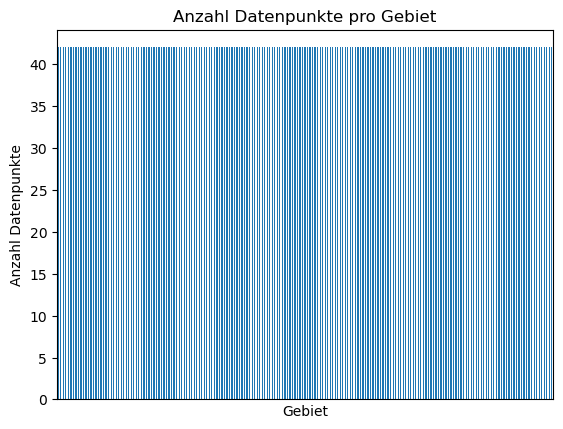

In [9]:
df["Gebiet"].value_counts().plot(kind="bar",
                                 xticks=[],     # disable labels on x-axis
                                 ylabel="Anzahl Datenpunkte", title="Anzahl Datenpunkte pro Gebiet")

In [10]:
print("Anzahl verschiedener Codes:", len(df["Code"].unique()))

Anzahl verschiedener Codes: 191


In [11]:
# Anzahl Datenpunkte pro Gebiet
df["Code"].value_counts()

Code
AFG    42
OMN    42
NLD    42
NZL    42
NIC    42
       ..
GEO    42
DEU    42
GHA    42
GRC    42
ZWE    42
Name: count, Length: 190, dtype: int64

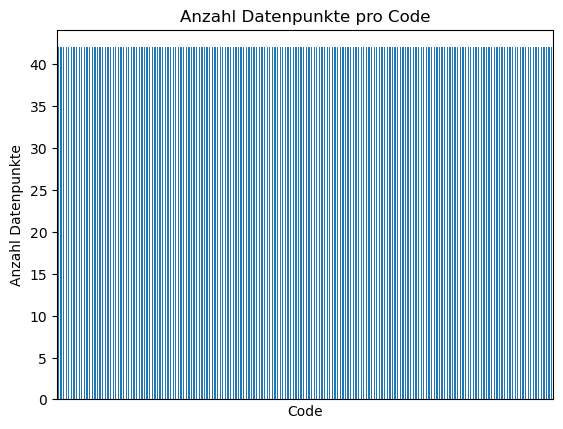

In [12]:
df["Code"].value_counts().plot(kind="bar", xticks=[], ylabel="Anzahl Datenpunkte", title="Anzahl Datenpunkte pro Code");

In [13]:
print("Anzahl verschiedener Jahre:", len(df["Jahr"].unique()))

Anzahl verschiedener Jahre: 42


In [14]:
# Anzahl Datenpunkte pro Jahr
df["Jahr"].value_counts().sort_index()

Jahr
1975    197
1976    197
1977    197
1978    197
1979    197
1980    197
1981    197
1982    197
1983    197
1984    197
1985    197
1986    197
1987    197
1988    197
1989    197
1990    197
1991    197
1992    197
1993    197
1994    197
1995    197
1996    197
1997    197
1998    197
1999    197
2000    197
2001    197
2002    197
2003    197
2004    197
2005    197
2006    197
2007    197
2008    197
2009    197
2010    197
2011    197
2012    197
2013    197
2014    197
2015    197
2016    197
Name: count, dtype: int64

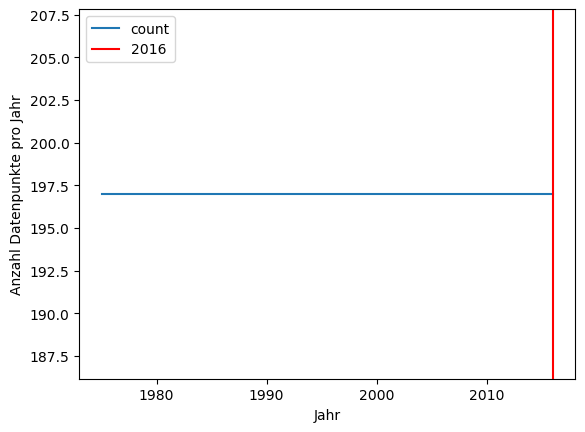

In [15]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df["Jahr"].value_counts().sort_index().plot(ylabel="Anzahl Datenpunkte pro Jahr");
g.axvline(x=2016, color="red", label="2016") # rote Linie bei 2016 - ab sind alle Jahre enthalten
g.legend()  # Legende anzeigen

In [16]:
df.describe()

,Jahr,Percentage
count,8274.000000,8274.000000
mean,1995.500000,11.866594
std,12.121651,9.696335
min,1975.000000,0.100000
25%,1985.000000,3.900000
50%,1995.500000,10.100000
75%,2006.000000,17.700000
max,2016.000000,60.700000


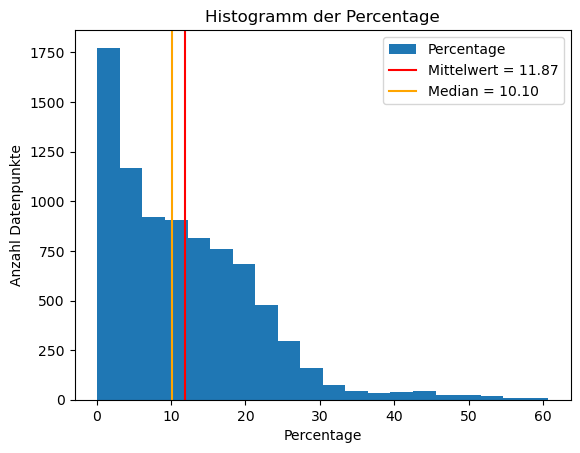

In [17]:
g = df['Percentage'].plot(kind='hist', bins=20, title='Histogramm der Percentage', 
                           xlabel='Percentage', ylabel='Anzahl Datenpunkte')
mean = df['Percentage'].mean()
g.axvline(x=df['Percentage'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Percentage'].median()
g.axvline(x=df['Percentage'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

